In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy  as np
import random
from typing import Tuple, List

In [3]:
random_img = np.zeros((200, 200), dtype=np.uint8)

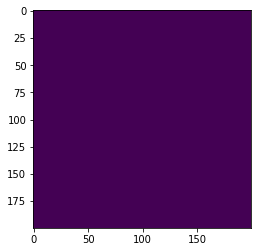

In [4]:
plt.imshow(random_img)

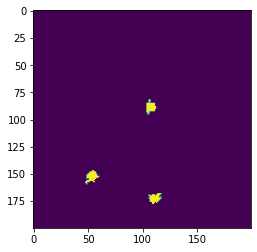

In [5]:
def createRandomComponent(np_image: np.ndarray, start: Tuple[int, int], end: Tuple[int, int]) -> np.ndarray:
    """
    Creates a random component in a given image.
    :param np_image: numpy array of image
    :param start: start position of component
    :param end: end position of component
    :return: image with random component
    """
    padding = 4
    start = (start[0] + padding, start[1] + padding)
    end = (end[0] - padding, end[1] - padding)
    center = (random.randint(start[0], end[0]), random.randint(start[1], end[1]))
    new_image = np.copy(np_image)
    new_image[center[0]][center[1]] = 255
    queue = [center]
    def prob(param):
        a = random.randint(10, 100)
        if param < a and param < 90:
            return True
        return False
    iter = 0
    while len(queue) > 0:
        tem = []
        
        for node in queue:
            for x,y in (0,1), (0,-1), (1,0), (-1,0):
                a,b = node[0]+x, node[1]+y
                if start[0] <= a <= end[0] and start[1] <= b <= end[1] and new_image[a][b] == 0 and prob(iter):
                    new_image[a][b] = 255
                    tem.append((a,b))
                    iter += 1
        queue = tem
    
    return new_image
nimg = createRandomComponent(random_img, (0,0), (200, 100))
nimg = createRandomComponent(nimg, (0,100), (100, 200))
nimg = createRandomComponent(nimg, (150, 100), (200, 200))
plt.imshow(nimg)

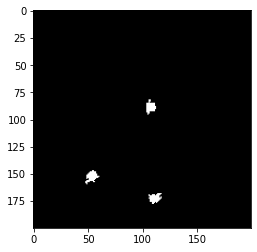

In [6]:
plt.imshow(nimg, cmap="gray")

In [7]:
def _dfs(np_image, i, j, visited):
    if i < 0 or i >= np_image.shape[0] or j < 0 or j >= np_image.shape[1] or np_image[i][j] != 255 or visited[i][j]:
        return

    visited[i][j] = True

    _dfs(np_image, i-1, j, visited)
    _dfs(np_image, i+1, j, visited)
    _dfs(np_image, i, j-1, visited)
    _dfs(np_image, i, j+1, visited)

def noOfConnectedComponents(np_image: np.ndarray) -> int:
    """
    Counts the number of connected components in the image.
    :param np_image: numpy array of image
    :return: (number of connected components, components coord)
    """
    visited = np.zeros(np_image.shape, dtype=bool)
    count = 0
    comp = []
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            if np_image[i][j] == 255 and  visited[i][j] == False:
                comp.append((i,j))
                count += 1
                _dfs(np_image, i, j, visited)
    return count, comp
count, comp = noOfConnectedComponents(nimg)

In [15]:
count

3

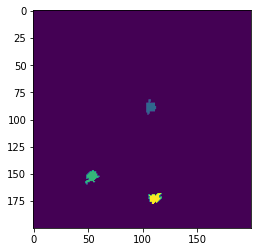

In [16]:
def _colordfs(np_image, i, j, color):
    if i < 0 or i >= np_image.shape[0] or j < 0 or j >= np_image.shape[1] or np_image[i][j] != 255:
        return
    
    np_image[i][j] = color

    _colordfs(np_image, i-1, j, color)
    _colordfs(np_image, i+1, j, color)
    _colordfs(np_image, i, j-1, color)
    _colordfs(np_image, i, j+1, color)

def markConnectedComponents(np_image: np.ndarray, coords: List[Tuple[int, int]]) -> np.ndarray:
    """
    Marks the connected components in the image.
    :param np_image: numpy array of image
    :return: image with connected components marked
    """
    new_image = np.copy(np_image)
    for ind, i in enumerate(coords):
        color = (ind+1)*50
        _colordfs(new_image, i[0], i[1], color)
    return new_image
ns = markConnectedComponents(nimg, comp)
plt.imshow(ns)